# Supervised Learning
## https://archive.ics.uci.edu/ml/datasets/adult

# Import Libraries and read the the csv file

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
# column names for the dataset
colnames = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'annum-salary']
# Read the csv file with colnames names of the columns for the dataset
df = pd.read_csv('adult.data', names=colnames, header=None)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annum-salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
# mean of each features in dataset
df.mean()

age                   38.581647
fnlwgt            189778.366512
education-num         10.080679
capital-gain        1077.648844
capital-loss          87.303830
hours-per-week        40.437456
dtype: float64

In [5]:
# median of each features in dataset
df.median()

age                   37.0
fnlwgt            178356.0
education-num         10.0
capital-gain           0.0
capital-loss           0.0
hours-per-week        40.0
dtype: float64

# Find and Handle Missing values/Null values

In [6]:
# Print the number of null values in df
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annum-salary      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annum-salary    32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Print all the unique values for each columns
for name in df.columns:
    print(name,':\n',df[name].unique(),'\n')

age :
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

workclass :
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

fnlwgt :
 [ 77516  83311 215646 ...  34066  84661 257302] 

education :
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

education-num :
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

marital-status :
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation :
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving

In [9]:
#  A list having column names with value '?'
unknown = ['workclass','occupation','native-country']

In [10]:
# Number of unknown(?) values in the three columns from the above list
for name in unknown:
    print(name,':',sum(df[name].str.strip() == '?'))

workclass : 1836
occupation : 1843
native-country : 583


In [11]:
# Printing the table with all the rows having ? value
df.loc[df.workclass.str.strip() == '?',:]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annum-salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [12]:
# dropping the above displayed rows from the dataset
for name in unknown:
    df.drop(df[df[name].str.strip() == '?'].index,inplace = True)

In [13]:
for name in df.select_dtypes('object'):
    df[name] = df[name].str.strip()

In [14]:
# list of columns with nominal values
nom_vars = ['workclass','marital-status','occupation','relationship','race','sex','native-country']
# list of column with ordinal values
ord_vars = {'education': ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','Prof-school','Assoc-acdm','Assoc-voc',
                          'Some-college','Bachelors','Masters','Doctorate'], 'annum-salary': ['<=50K','>50K']}

In [15]:
# unique values in education
df.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

In [16]:
for name in nom_vars:
    df[name] = df[name].astype('category')
for name,levels in ord_vars.items():
    df[name] = df[name].astype(pd.CategoricalDtype(levels,ordered=True))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   workclass       30162 non-null  category
 2   fnlwgt          30162 non-null  int64   
 3   education       30162 non-null  category
 4   education-num   30162 non-null  int64   
 5   marital-status  30162 non-null  category
 6   occupation      30162 non-null  category
 7   relationship    30162 non-null  category
 8   race            30162 non-null  category
 9   sex             30162 non-null  category
 10  capital-gain    30162 non-null  int64   
 11  capital-loss    30162 non-null  int64   
 12  hours-per-week  30162 non-null  int64   
 13  native-country  30162 non-null  category
 14  annum-salary    30162 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.9 MB


In [18]:
# Return Series of codes as well as the index
for name in df.select_dtypes('category'):
    df[name] = df[name].cat.codes

In [19]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annum-salary
0,39,5,77516,13,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,13,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,8,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,6,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,13,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,10,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,8,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,8,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,8,9,4,0,3,4,1,0,0,20,38,0


# Heat Map

<AxesSubplot:>

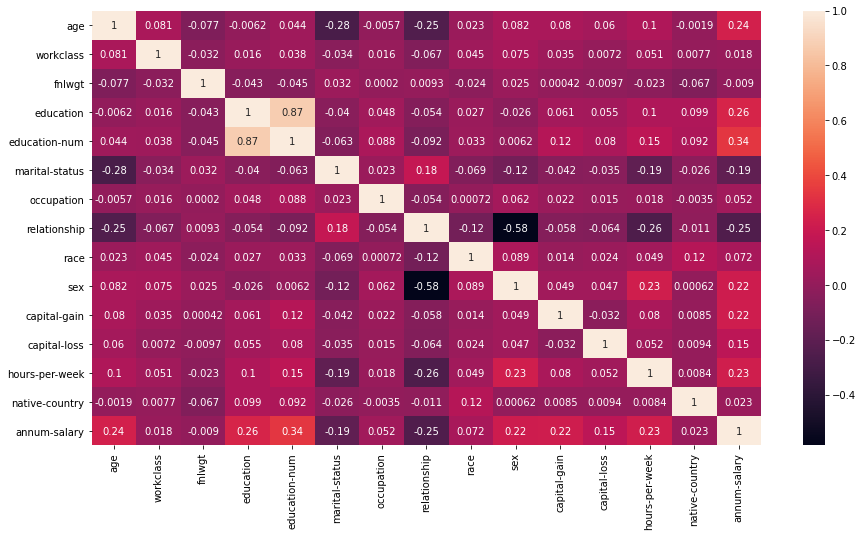

In [20]:
# Plotting heatmap and finding correlation in the data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cor = df.corr() # correlation

plt. figure(figsize=(15,8))
sns.heatmap(cor, annot = True) # heatmap for correlation

In [21]:
# Selecting the features with high correlation from the heatmap
num_vars = ['age','education-num','capital-gain','hours-per-week']

In [22]:
df_num =df[num_vars]
df_num

,age,education-num,capital-gain,hours-per-week
0,39,13,2174,40
1,50,13,0,13
2,38,9,0,40
3,53,7,0,40
4,28,13,0,40
...,...,...,...,...
32556,27,12,0,38
32557,40,9,0,40
32558,58,9,0,40
32559,22,9,0,20


# Box Plot

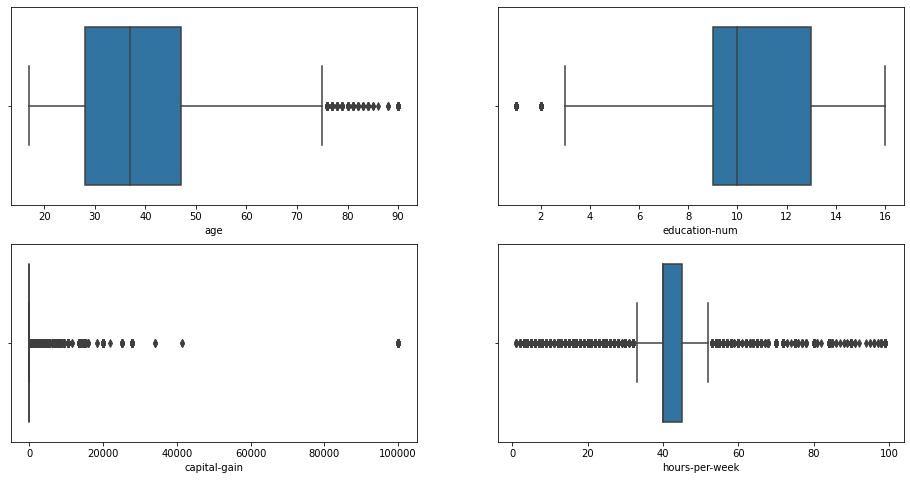

In [23]:
# box plot for all selected features
fig, ax = plt.subplots(2,2,figsize=(16,8))
s = 0
for i in range(2):
    for j in range(2):
        ax[i,j] = sns.boxplot(x=df_num[num_vars[s]],ax=ax[i,j])
        s +=1

# Removing Outliers

In [24]:
# Finding the outliers range for the selected features
Q1 = df_num.quantile(.25)
Q3 = df_num.quantile(.75)
IQR = Q3-Q1
a = Q1 - (IQR * 1.5)
b = Q3 + (IQR * 1.5)
a,b

(age               -0.5
 education-num      3.0
 capital-gain       0.0
 hours-per-week    32.5
 dtype: float64,
 age               75.5
 education-num     19.0
 capital-gain       0.0
 hours-per-week    52.5
 dtype: float64)

In [25]:
X = pd.DataFrame({'age': df['age'], 
                  'education-num': df['education-num'],
                  'capital-gain': df['capital-gain'], 
                  'hours-per-week': df['hours-per-week']})

In [26]:
# Removing the outlier and  printing the table
for name in num_vars:
    temp = X[(X[name] >= a[name]) & (X[name] <= b[name])]
temp

,age,education-num,capital-gain,hours-per-week
0,39,13,2174,40
2,38,9,0,40
3,53,7,0,40
4,28,13,0,40
5,37,14,0,40
...,...,...,...,...
32555,22,10,0,40
32556,27,12,0,38
32557,40,9,0,40
32558,58,9,0,40


# Normalization

In [27]:
# Normalization of the selected features
for i in temp.columns:
    temp[i] = temp[i] / temp[i].max()
temp

<ipython-input-27-bfee09993b93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[i] = temp[i] / temp[i].max()


,age,education-num,capital-gain,hours-per-week
0,0.433333,0.8125,0.021740,0.769231
2,0.422222,0.5625,0.000000,0.769231
3,0.588889,0.4375,0.000000,0.769231
4,0.311111,0.8125,0.000000,0.769231
5,0.411111,0.8750,0.000000,0.769231
...,...,...,...,...
32555,0.244444,0.6250,0.000000,0.769231
32556,0.300000,0.7500,0.000000,0.730769
32557,0.444444,0.5625,0.000000,0.769231
32558,0.644444,0.5625,0.000000,0.769231


In [28]:
# adding the sex column
# It will only add the rows with the index present in the temp 
temp = temp.join(df.sex)

In [29]:
# adding the annum-salary column
# It will only add the rows with the index present in the temp 
temp = temp.join(df['annum-salary'])

In [30]:
temp

,age,education-num,capital-gain,hours-per-week,sex,annum-salary
0,0.433333,0.8125,0.021740,0.769231,1,0
2,0.422222,0.5625,0.000000,0.769231,1,0
3,0.588889,0.4375,0.000000,0.769231,1,0
4,0.311111,0.8125,0.000000,0.769231,0,0
5,0.411111,0.8750,0.000000,0.769231,0,0
...,...,...,...,...,...,...
32555,0.244444,0.6250,0.000000,0.769231,1,0
32556,0.300000,0.7500,0.000000,0.730769,0,0
32557,0.444444,0.5625,0.000000,0.769231,1,1
32558,0.644444,0.5625,0.000000,0.769231,0,0


# Supervised learning using Decision tree

# Splitting the data

In [31]:
# defining x and y
x = temp.iloc[:,:-1].values
y = temp.iloc[:,5].values

# Splitting the data into test and train sample
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Training the model and predicting the result 

In [32]:
# Using the Decision Tree classifier for the prediction
classifier=DecisionTreeClassifier()

# fitting the training sample to train the model
classifier=classifier.fit(x_train,y_train)

# predicting the test sample using the trained model
predicted=classifier.predict(x_test) 
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

# Evaluating the model

In [33]:
# confusion matrix
print ('Confusion Matrix :')
print(confusion_matrix(y_test, predicted))

# accuracy score
print ('\nAccuracy Score :',accuracy_score(y_test, predicted))

# classification report
print ('\nReport : ')
print (classification_report(y_test, predicted))

Confusion Matrix :
[[4500  419]
 [ 954  790]]

Accuracy Score : 0.7939366651658412

Report : 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      4919
           1       0.65      0.45      0.54      1744

    accuracy                           0.79      6663
   macro avg       0.74      0.68      0.70      6663
weighted avg       0.78      0.79      0.78      6663



# Unsupervised Learning

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score

In [35]:
# declaring the model with 2 clusters and 20 random centroid distributions
model = KMeans(n_clusters=2,n_init=20,random_state=0)

In [36]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annum-salary
0,39,5,77516,13,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,13,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,8,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,6,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,13,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,10,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,8,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,8,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,8,9,4,0,3,4,1,0,0,20,38,0


In [37]:
# splitted the data in X and y datasets
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [38]:
# extracted the predicted results
pred = model.fit_predict(X)

In [41]:
conf_mat = confusion_matrix(y,pred)
conf_mat

array([[16654,  6000],
       [ 5680,  1828]], dtype=int64)

<AxesSubplot:>

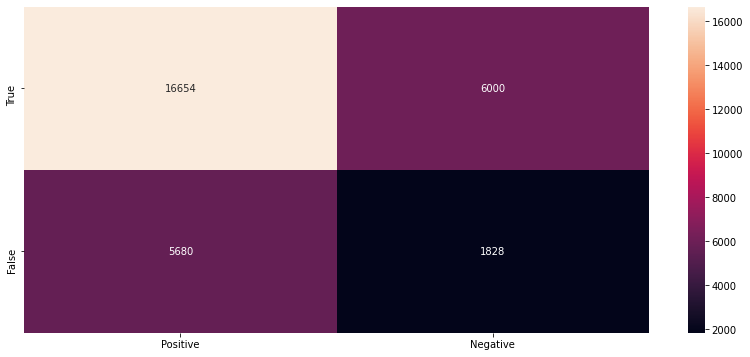

In [42]:
plt.figure(figsize=(14,6))
sns.heatmap(conf_mat,annot=True,xticklabels=('Positive','Negative'),yticklabels=('True','False'),fmt='d')

In [43]:
print(f"F1 Score: {round(f1_score(y,pred),2)}")

F1 Score: 0.24


In [44]:
print(f"Accuracy : {round(accuracy_score(y,pred)*100,2)}%")

Accuracy : 61.28%
